In [1]:
#Import pandas and your data file as a csv. Check the length and column names to verify proper loading of the data file.You can also check the shape. 
import pandas as pd
df=pd.read_csv (r'C:\Users\KHillesland\OneDrive - UW\Research\KSEE mutations\1000gens\NC_002937-UR1.csv')
len(df)
df.shape
for col in df.columns:
    print(col)

positions
0
100
300
500
780
1000
1500
2300
2400
2600
2800
3000
3500
4000
4500
poly_0
poly_100
poly_300
poly_500
poly_780
poly_1000
poly_1500
poly_2300
poly_2400
poly_2600
poly_2800
poly_3000
poly_3500
poly_4000
poly_4500
depth_0
depth_100
depth_300
depth_500
depth_780
depth_1000
depth_1500
depth_2300
depth_2400
depth_2600
depth_2800
depth_3000
depth_3500
depth_4000
depth_4500
entry_type
REF
ALT
mutation_detail
snp_type
evidence_type
locus_tag
gene_product


In [2]:
# Check the NalR ancestral mutation, at position 5565. It should be present at all generations in A and R cocultures but absent in S and E cocultures. 
#In monocultures the NalR mutation should be present in odd numbered cultures. 
df.loc[df['positions']==5565]

,positions,0,100,300,500,780,1000,1500,2300,2400,...,depth_4000,depth_4500,entry_type,REF,ALT,mutation_detail,snp_type,evidence_type,locus_tag,gene_product
0,5565,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,260.0,310.0,SNP,G,A,A,nonsynonymous,RA,DVU0004,DNA gyrase subunit A


In [3]:
#remove unneccessary columns. In this case we are only analysing the first 1000 generations of evolution, so higher generations are removed. 
df2=df.drop(columns=['1500','2300', '2400', '2600', '2800','3000','3500', '4000', '4500'])
df2

,positions,0,100,300,500,780,1000,poly_0,poly_100,poly_300,...,depth_4000,depth_4500,entry_type,REF,ALT,mutation_detail,snp_type,evidence_type,locus_tag,gene_product
0,5565,0.0,1.0,1.000000,1.0,1.0,1.0,0.0,1.0,1.000000,...,260.0,310.0,SNP,G,A,A,nonsynonymous,RA,DVU0004,DNA gyrase subunit A
1,16512,0.0,0.0,0.645576,1.0,1.0,1.0,0.0,0.0,0.645576,...,NaN,NaN,DEL,NC_002937,16511,3,NaN,JC,DVU0013,sensory box histidine kinase
2,17437,0.0,0.0,0.060866,0.0,0.0,0.0,0.0,0.0,0.060866,...,0.0,0.0,DEL,NC_002937,17467,30,NaN,JC,DVU0013,sensory box histidine kinase
3,37345,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,233.0,282.0,SNP,A,T,T,nonsynonymous,RA,DVU0030,GntR family transcriptional regulator
4,37789,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,SNP,C,G,G,nonsynonymous,RA,DVU0030,GntR family transcriptional regulator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,3330710,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,SNP,T,C,C,synonymous,RA,DVU3172,hypothetical protein
103,3330855,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,SNP,G,T,T,nonsynonymous,RA,DVU3172,hypothetical protein
104,3381728,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,293.0,310.0,SNP,A,C,C,nonsynonymous,RA,DVU3214,phosphoenolpyruvate synthase
105,3381998,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,SNP,A,C,C,nonsynonymous,RA,DVU3214,phosphoenolpyruvate synthase


In [4]:
# Make a new dataframe where you have removed all mutations in df that never rise above 20% frequency.
#Check the length and compare to df to make sure it worked as expected.
df3=df2[~((df2['0']<0.2) & (df2['100']<0.2) & (df2['300']<0.2) & (df2['500']<0.2) & (df2['780']<0.2) & (df2['1000']<0.2))]
df3.shape

(23, 45)

In [5]:
#remove ancestral mutations
df4=df3[(df3.positions !=5565)&(df3.positions !=2983995)]
(df4)


,positions,0,100,300,500,780,1000,poly_0,poly_100,poly_300,...,depth_4000,depth_4500,entry_type,REF,ALT,mutation_detail,snp_type,evidence_type,locus_tag,gene_product
1,16512,0.0,0.000000,0.645576,1.000000,1.000000,1.000000,0.0,0.000000,0.645576,...,NaN,NaN,DEL,NC_002937,16511,3,NaN,JC,DVU0013,sensory box histidine kinase
5,39264,0.0,0.000000,0.000000,0.000000,0.268619,0.869189,0.0,0.000000,0.000000,...,279.0,290.0,SNP,A,T,T,nonsynonymous,RA,DVU0032,hypothetical protein
13,489871,0.0,0.000000,0.000000,0.000000,0.742875,0.882642,0.0,0.000000,0.000000,...,223.0,246.0,SNP,T,G,G,nonsynonymous,RA,DVU0436,TetR family transcriptional regulator
22,744700,0.0,0.000000,0.000000,0.000000,0.000000,0.299989,0.0,0.000000,0.000000,...,229.0,211.0,DEL,T,.,1,NaN,RA,DVU0670,exopolysaccharide production protein
23,744701,0.0,0.000000,0.000000,0.000000,0.000000,0.290375,0.0,0.000000,0.000000,...,0.0,217.0,DEL,C,.,1,NaN,RA,DVU0670,exopolysaccharide production protein
25,794716,0.0,0.000000,0.000000,0.000000,0.000000,0.803585,0.0,0.000000,0.000000,...,235.0,233.0,INS,.,T,T,NaN,RA,DVU0713,branched-chain amino acid ABC transporter perm...
32,934373,0.0,0.000000,0.088232,0.000000,0.746268,0.876711,0.0,0.000000,0.088232,...,189.0,315.0,DEL,C,.,1,NaN,RA,DVU0846,adenylylsulfate reductase subunit beta
55,1305935,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,216.0,252.0,DEL,A,.,1,NaN,RA,DVU1214,dolichyl-phosphate-mannose-protein mannosyltra...
56,1348220,0.0,0.000000,0.000000,0.000000,0.423309,0.849998,0.0,0.000000,0.000000,...,205.0,241.0,DEL,A,.,1,NaN,RA,DVU1260,outer membrane protein P1
57,1348221,0.0,0.000000,0.000000,0.000000,0.423309,0.849998,0.0,0.000000,0.000000,...,204.0,241.0,DEL,T,.,1,NaN,RA,DVU1260,outer membrane protein P1


In [6]:
# Make a test dataframe to identify mutations that are adjacent to each other.
# If the mutations are adjacent, a '1' will appear in column "TorF".
# Go to the online mutation database and check whether the mutations occur on the same read.
# If on the same read, revise the first mutation to reflect both nucleotide changes. Then remove the row for the second mutation. 
#Instructions for appending and removing mutations will be in the next cell. 
dftest=pd.DataFrame({"Num": df4['positions']})
dftest["TorF"]=(dftest["Num"].diff()<2).astype(int)
print(dftest)

        Num  TorF
1     16512     0
5     39264     0
13   489871     0
22   744700     0
23   744701     1
25   794716     0
32   934373     0
55  1305935     0
56  1348220     0
57  1348221     1
69  1852736     0
74  2408029     0
76  2498463     0
77  2556410     0
78  2556545     0
84  2771141     0
86  2884901     0
89  2992636     0
94  3047011     0
95  3047012     1
96  3278071     0


In [7]:
#If the dataframe is too long and jupyter will not print whole thing, you can use this to print out all cases where there was '1'
dftest.loc[dftest['TorF']==1]

,Num,TorF
23,744701,1
57,1348221,1
95,3047012,1


In [8]:
df4.loc[[521]]

,positions,0,100,300,500,780,1000,poly_0,poly_100,poly_300,...,depth_4000,depth_4500,entry_type,REF,ALT,mutation_detail,snp_type,evidence_type,locus_tag,gene_product
521,2992346,0.0,0.0,0.504478,0.0,0.519995,0.0,0.0,0.0,0.504478,...,0.0,0.0,DEL,A,.,1,NaN,RA,DVU2894,sigma-54 dependent transcriptional regulator


In [11]:
#now look up the data on the sequential mutations to know which timepoints to look for in Breseq
df4.loc[df4['positions']==744701]
#you can also use 
#df.loc[[index#]]

,positions,0,100,300,500,780,1000,poly_0,poly_100,poly_300,...,depth_4000,depth_4500,entry_type,REF,ALT,mutation_detail,snp_type,evidence_type,locus_tag,gene_product
23,744701,0.0,0.0,0.0,0.0,0.0,0.290375,0.0,0.0,0.0,...,0.0,217.0,DEL,C,.,1,NaN,RA,DVU0670,exopolysaccharide production protein


In [12]:
#now look up the data on the sequential mutations to know which timepoints to look for in Breseq
df4.loc[df4['positions']==1348221]
#you can also use 
#df.loc[[index#]]

,positions,0,100,300,500,780,1000,poly_0,poly_100,poly_300,...,depth_4000,depth_4500,entry_type,REF,ALT,mutation_detail,snp_type,evidence_type,locus_tag,gene_product
57,1348221,0.0,0.0,0.0,0.0,0.423309,0.849998,0.0,0.0,0.0,...,204.0,241.0,DEL,T,.,1,NaN,RA,DVU1260,outer membrane protein P1


In [13]:
#now look up the data on the sequential mutations to know which timepoints to look for in Breseq
df4.loc[df4['positions']==3047012]
#you can also use 
#df.loc[[index#]]

,positions,0,100,300,500,780,1000,poly_0,poly_100,poly_300,...,depth_4000,depth_4500,entry_type,REF,ALT,mutation_detail,snp_type,evidence_type,locus_tag,gene_product
95,3047012,0.0,0.0,0.0,0.0,0.210523,0.0,0.0,0.0,0.0,...,0.0,0.0,DEL,C,.,1,NaN,RA,DVU2941,hypothetical protein


In [14]:
#change 744700, 1348220, 3047011 because there were 2bp deletions taht were annotated as two separate 1bp deletins.
#index for that row, column name.
df4.at[22,'mutation_detail'] = 2
df4.at[56,'mutation_detail'] = 2
df4.at[94,'mutation_detail'] = 2

In [15]:
#remove mutations 744701, 1348221, 3047012 because now spurious
df5=df4[(df4.positions !=744701)&(df4.positions !=1348221)&(df4.positions !=3047012)]
df5.shape

(18, 45)

<AxesSubplot:>

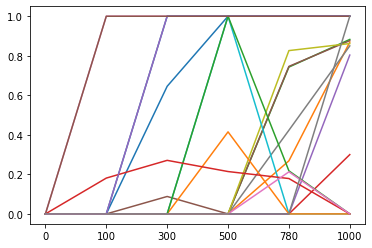

In [16]:
# Make a line graph of mutations over generations to check for any problems in the data and identify mutations that defy population genetics. 
# If all mutations go away and are replaced with entirely new mutations, there may be a culture or data swap.This should be checked in both species for cocultures.
# If non-fixed mutations do not go extinct or sweep to fixation when a selective sweep is happening, then they must be errors and should be removed.
#Fixed mutations generally group together and stay at high frequency (~90%) together and never go extinct. 
df6=df5[['0', '100', '300', '500', '780','1000']]
df6_T=df6.transpose()
#changle 'legend' to 1 if you want to see the color for each line, which is denoted as the index number from df3.
df6_T.plot.line(legend=0)

In [17]:
#Save to csv to open and explore graph in excel or Wooyoung's mutation dynamics program.
df5.to_csv('C:/Users/KHillesland/Downloads/UR1_D_testgraph.csv', index=False)

In [18]:
#3278071 is a consistent error in Dv. 2771141 stays at low frequency
df6=df5[(df5.positions !=3278071) & (df5.positions !=2771141)]
df6.shape

(16, 45)

In [19]:
#Save to csv.
df6.to_csv('C:/Users/KHillesland/Downloads/UR1_Dcleaned.csv', index=False)